In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
seattle_listing = pd.read_csv('./listings.csv')

In [3]:
#5 row of the data and columns information.
seattle_listing.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [4]:
# list columns value
print(list(seattle_listing.columns.values))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

In [ ]:
'''
There are many columns, so I can't explore each columns here.
Here I'll look at some columns of my interest.
First, I'll investigate how many listings are in the data.
'''

In [8]:
print("Num of listings: ", seattle_listing.id.count())
print("Num of rows: ", seattle_listing.shape[0])

Num of listings:  3818
Num of rows:  3818


In [ ]:
'''
This shows the each rows represents unique listings.
Next, I am interested in below columns.

review_scores_rating
price
maximum_nights
What is the distribution of these values in each columns? Is the distribution skewed or normal?
Let's look at!
'''

In [5]:
seattle_listing['review_scores_rating'].describe().reset_index()

index  review_scores_rating
0  count           3171.000000
1   mean             94.539262
2    std              6.606083
3    min             20.000000
4    25%             93.000000
5    50%             96.000000
6    75%             99.000000
7    max            100.000000

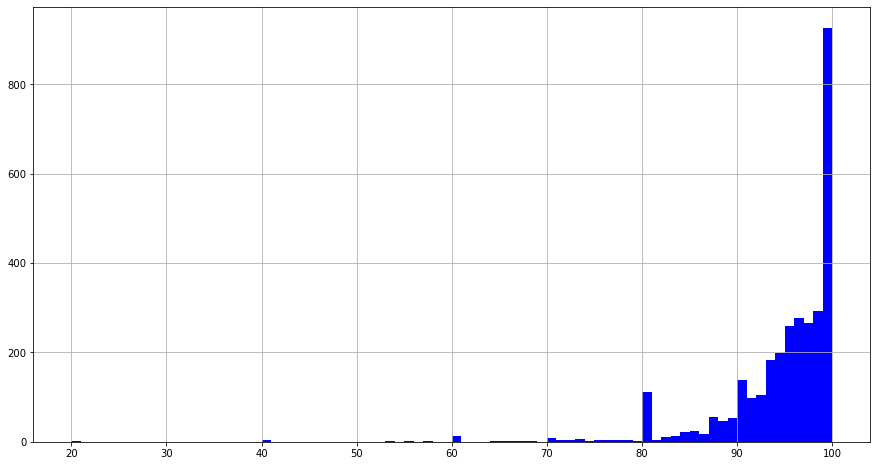

In [9]:
# cleaning data
listings_q1_df = seattle_listing['review_scores_rating'].dropna()

# plot histgram
plt.figure(figsize=(15, 8))
plt.hist(listings_q1_df.values, bins=80, color='b')
plt.grid()

In [ ]:
'''
This is very right skewed distribution.
The 75% or more values are 90 points. And the most common thing is 100 points.
I can say the low score listings are minolity.
'''

In [10]:
# cleaning data
listings_q2_df = seattle_listing.copy(deep=True)
listings_q2_df = listings_q2_df['price'].dropna().reset_index()
listings_q2_df['price'] = listings_q2_df['price'].map(lambda x: float(x[1:].replace(',', '')))

listings_q2_df['price'].describe().reset_index()

index        price
0  count  3818.000000
1   mean   127.976166
2    std    90.250022
3    min    20.000000
4    25%    75.000000
5    50%   100.000000
6    75%   150.000000
7    max  1000.000000

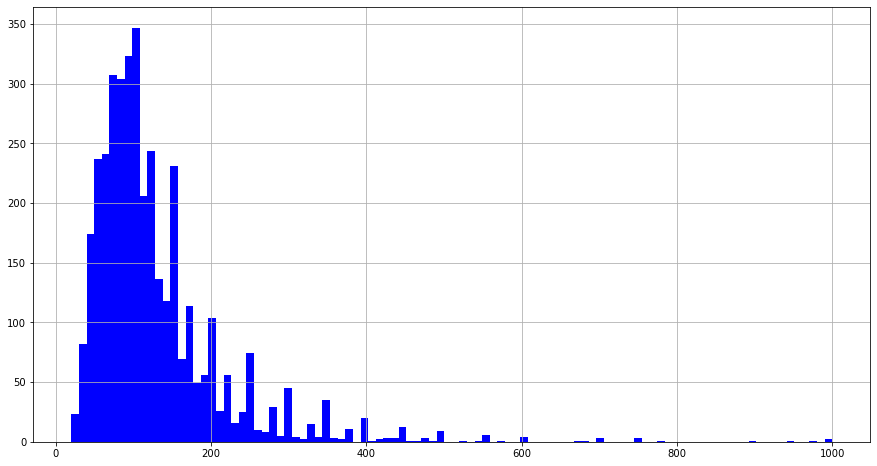

In [11]:
plt.figure(figsize=(15, 8))
plt.hist(listings_q2_df.price, bins=100, color='b')
plt.grid()

In [ ]:
'''
This is long tail distribution.
Almost values are from 0 to 200.
'''

In [12]:
seattle_listing['maximum_nights'].describe().reset_index()

index  maximum_nights
0  count     3818.000000
1   mean      780.447617
2    std     1683.589007
3    min        1.000000
4    25%       60.000000
5    50%     1125.000000
6    75%     1125.000000
7    max   100000.000000

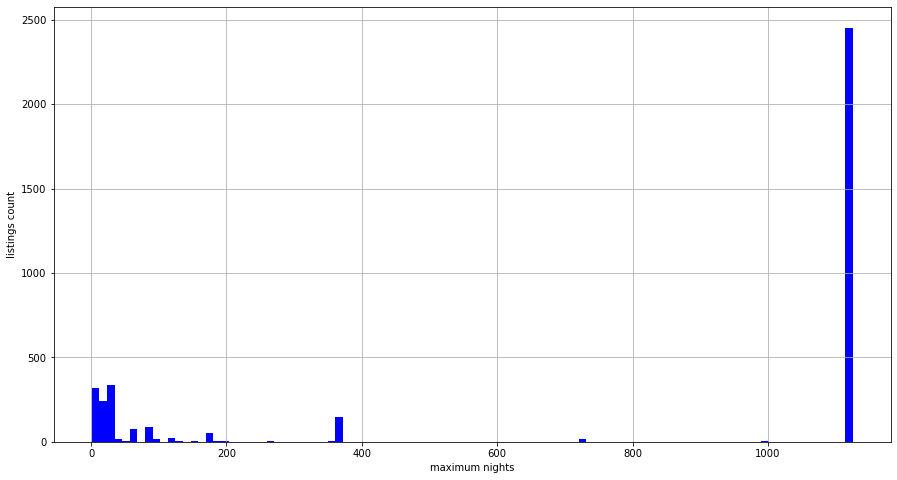

In [13]:
# eliminate outliers because maximum values are very large.
listings_q3_df = seattle_listing[seattle_listing['maximum_nights'] <= 1500]

plt.figure(figsize=(15, 8))
plt.hist(listings_q3_df.maximum_nights, bins=100, color='b')
plt.xlabel('maximum nights')
plt.ylabel('listings count')
plt.grid()

In [ ]:
'''
This is very surprising because I expect it would be a week at most.
In fact, almost maxmum_night values are setted 1125.
I have not used Airbnb so I don't know, but maybe there may be something like the default value.
Or there maybe two segments, one is spot available listings, the other is long term listings like normal rent.
'''

In [ ]:
'''
Summary
The listings data has 92 columns.
The review_scores_rating has right skewed distribution, and almost values are over 90 points.
The price has long tail distribution, almost values are around 100$ but some values are much higher than other values.
The maximum_nights has very special distribution. Their are two segments, one is about 3 years, the other is around 1week.
'''